# <center>Streaming Content Trend Analysis: Unveiling Insights


### Project Introduction: Streaming Content Trend Analysis

Welcome to the Streaming Content Trend Analysis project! 

In this analysis, I delve into the fascinating world of streaming platforms to uncover insights and trends shaping the industry. 

By examining key aspects such as content release patterns, genre popularity, director and actor prominence, and more, I aim to provide valuable insights into the dynamics of the streaming content landscape. 

Through meticulous data analysis and visualization techniques, I unravel trends that inform strategic decision-making for stakeholders in the streaming industry.

Let's embark on this journey to unveil the trends shaping the future of streaming content!



In [484]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [485]:
# upload data
netflix = pd.read_csv('/Users/karanvirgosal/Desktop/netflix_titles.csv')
amazon = pd.read_csv('/Users/karanvirgosal/Desktop/amazon_prime_titles.csv')
disney = pd.read_csv('/Users/karanvirgosal/Desktop/disney_plus_titles.csv')

## Make ids unique since they overlap

In [486]:
amazon['show_id'] = amazon['show_id'].str.replace('s','a')
amazon.head()
disney['show_id'] = disney['show_id'].str.replace('s','d')
disney.head()
netflix['show_id'] = netflix['show_id'].str.replace('s','n')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,n1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,n2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,n3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,n4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,n5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Combine data

In [487]:
streaming_data = pd.concat([netflix, amazon, disney])
streaming_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,n1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,n2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,n3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,n4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,n5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Check for duplicates

In [488]:
streaming_data.duplicated().sum()

0

## See null values

In [489]:
streaming_data.isnull().sum()

show_id             0
type                0
title               0
director         5190
cast             2248
country         10046
date_added       9526
release_year        0
rating            344
duration            3
listed_in           0
description         0
dtype: int64

## Fix duration columns, fill missing data with data from another column, and check for inconsistencies

In [490]:
streaming_data.loc[streaming_data['duration'].isna(), 'duration'] = streaming_data.loc[streaming_data['duration'].isna(), 'rating']

In [491]:
streaming_data[~streaming_data['duration'].str.contains('min|Season')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


## Fix rating columns, check for inconsistencies

In [492]:
streaming_data['rating'] = streaming_data['rating'].fillna('Unrated')
streaming_data['rating'].value_counts()

rating
TV-MA       3284
TV-14       2447
13+         2117
R           1809
16+         1547
TV-PG       1333
ALL         1268
18+         1243
PG-13        949
PG           776
TV-G         619
TV-Y7        504
TV-Y         431
G            387
7+           385
Unrated      344
NR           303
TV-NR        105
UNRATED       33
TV-Y7-FV      19
NC-17          6
UR             3
AGES_18_       3
NOT_RATE       3
AGES_16_       2
66 min         1
84 min         1
74 min         1
16             1
ALL_AGES       1
Name: count, dtype: int64

In [493]:
streaming_data.loc[(streaming_data['rating'].str.contains('min'), 'rating')] = ['R','R','R']

In [494]:
streaming_data.loc[(streaming_data['rating'].str.contains('TV-MA|R|16+|18+|NR|NC-17|UR|AGES_18_'), 'rating')] = 'R'

In [495]:
streaming_data.loc[(streaming_data['rating'].str.contains('TV-14|PG-13|13+'), 'rating')] = 'PG-13'

In [496]:
streaming_data.loc[(streaming_data['rating'].str.contains('TV-PG'), 'rating')] = 'PG'

In [497]:
streaming_data.loc[(streaming_data['rating'].str.contains('ALL|TV-G|TV-Y7|TV-Y|7+|TV-Y7-FV|ALL_AGES|Unrated'), 'rating')] = 'G'

## Now that the ratings column is clean, let's fill in the rest with "Not Listed"

In [498]:
streaming_data.loc[streaming_data['date_added'].isna(), 'date_added'] = 'Not Listed'

In [499]:
streaming_data.loc[streaming_data['country'].isna(), 'country'] = 'Not Listed'

In [500]:
streaming_data.loc[streaming_data['cast'].isna(), 'cast'] = 'Not Listed'

In [501]:
streaming_data.loc[streaming_data['director'].isna(), 'director'] = 'Not Listed'

## Now let's check if there are any nulls or duplicates left

In [502]:
streaming_data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [503]:
streaming_data.duplicated().sum()

0

## Convert date_added to datetime

In [504]:
streaming_data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [505]:
streaming_data['date_added'] = pd.to_datetime(streaming_data['date_added'], errors='coerce', infer_datetime_format=True)

/tmp/ipykernel_53667/210166792.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  streaming_data['date_added'] = pd.to_datetime(streaming_data['date_added'], errors='coerce', infer_datetime_format=True)


## We'll have some missing dates but that's fine, we'll remove when necessary

# Perfect! Now we can start diving into the data

In [506]:
streaming_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,n1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Listed,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,n2,TV Show,Blood & Water,Not Listed,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,R,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,n3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Listed,2021-09-24,2021,R,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,n4,TV Show,Jailbirds New Orleans,Not Listed,Not Listed,Not Listed,2021-09-24,2021,R,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,n5,TV Show,Kota Factory,Not Listed,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,R,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,d1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom",2021-06-04,2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,d1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada",2021-04-02,2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,d1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States",2020-12-18,2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,d1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States",2020-09-18,2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


## Let's see what are the most popular genres on all 3 platforms, lets start be creating a platform column

In [507]:
streaming_data['platform'] = np.where(streaming_data['show_id'].str.contains('n'), 'Netflix',
                                     np.where(streaming_data['show_id'].str.contains('a'), 'Amazon',
                                     np.where(streaming_data['show_id'].str.contains('d'), 'Disney+', 'Other')))

In [508]:
totals = streaming_data['platform'].value_counts().reset_index()
print(totals)

  platform  count
0   Amazon   9668
1  Netflix   8807
2  Disney+   1450


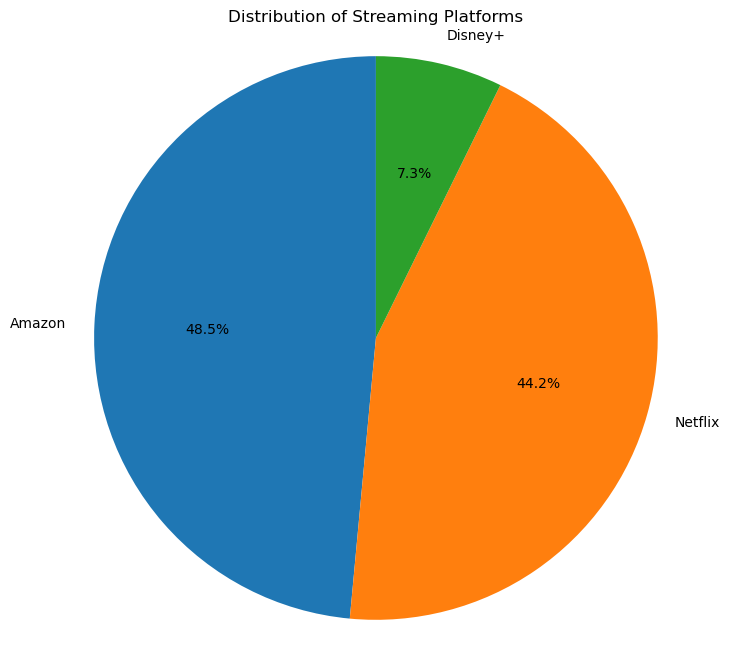

In [509]:
plt.figure(figsize=(8, 8))
plt.pie(totals['count'], labels = totals['platform'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Streaming Platforms')
plt.axis('equal')
plt.show()

In [510]:
streaming_data.groupby('platform')[['listed_in']].apply(lambda x: x.value_counts().nlargest(3))

platform  listed_in                          
Amazon    Drama                                  986
          Comedy                                 536
          Drama, Suspense                        399
Disney+   Animation, Comedy, Family              124
          Action-Adventure, Animation, Comedy     77
          Action-Adventure, Animation, Kids       45
Netflix   Dramas, International Movies           362
          Documentaries                          359
          Stand-Up Comedy                        334
Name: count, dtype: int64

In [511]:
def top_n_single_word_genres(streaming_data):

    single_word_genres = streaming_data['listed_in'].str.split(', ').explode()
    

    single_word_genres = single_word_genres[single_word_genres.str.split().str.len() == 1]
    
    
    return single_word_genres.value_counts().nlargest(3)

# Group by 'platform' and apply the top_n_single_word_genres function to each group
top_genres_by_platform = streaming_data.groupby('platform').apply(top_n_single_word_genres)

print(top_genres_by_platform)

platform  listed_in    
Amazon    Drama            3687
          Comedy           2099
          Action           1657
Disney+   Family            632
          Animation         542
          Comedy            526
Netflix   Dramas           2427
          Comedies         1674
          Documentaries     869
Name: count, dtype: int64


In [512]:
top_genres_by_platform = top_genres_by_platform.reset_index()
print(top_genres_by_platform)

  platform      listed_in  count
0   Amazon          Drama   3687
1   Amazon         Comedy   2099
2   Amazon         Action   1657
3  Disney+         Family    632
4  Disney+      Animation    542
5  Disney+         Comedy    526
6  Netflix         Dramas   2427
7  Netflix       Comedies   1674
8  Netflix  Documentaries    869


In [513]:
top_genres_by_platform.loc[top_genres_by_platform['listed_in']=='Dramas', 'listed_in'] = 'Drama'
top_genres_by_platform.loc[top_genres_by_platform['listed_in']=='Comedies', 'listed_in'] = 'Comedy'
top_genres_by_platform.loc[top_genres_by_platform['listed_in']=='Documentaries', 'listed_in'] = 'Documentary'
print(top_genres_by_platform)

  platform    listed_in  count
0   Amazon        Drama   3687
1   Amazon       Comedy   2099
2   Amazon       Action   1657
3  Disney+       Family    632
4  Disney+    Animation    542
5  Disney+       Comedy    526
6  Netflix        Drama   2427
7  Netflix       Comedy   1674
8  Netflix  Documentary    869


In [514]:
top_genres_by_platform_sorted = top_genres_by_platform.sort_values(by='count', ascending=False)

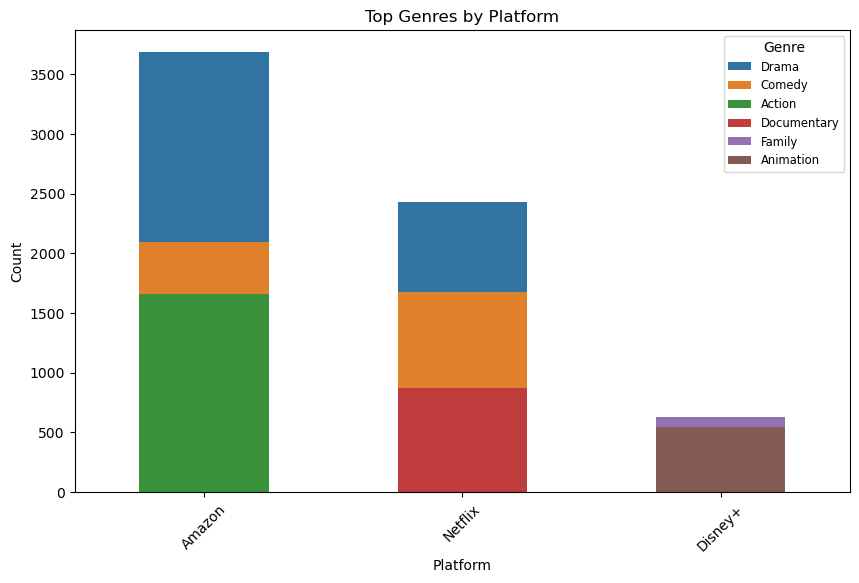

In [515]:
plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='count', hue='listed_in', data = top_genres_by_platform_sorted, width=0.5, dodge = False)
plt.xlabel('Platform')
plt.ylabel('Count')
plt.title('Top Genres by Platform')
plt.xticks(rotation=45)
plt.legend(title='Genre', fontsize='small')
plt.show()

### <center>The most popular genres among both Amazon Prime and Netflix are Dramas and Comedies. Meanwhile, Disney is more focused on Animation and Family content. This shows that both services are catered to adults while Disney is catered to kids. Documentaries are also big on Netflix. Action films are also more prevalent on Amazon Prime.

## Now let's see streaming popularity over time

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


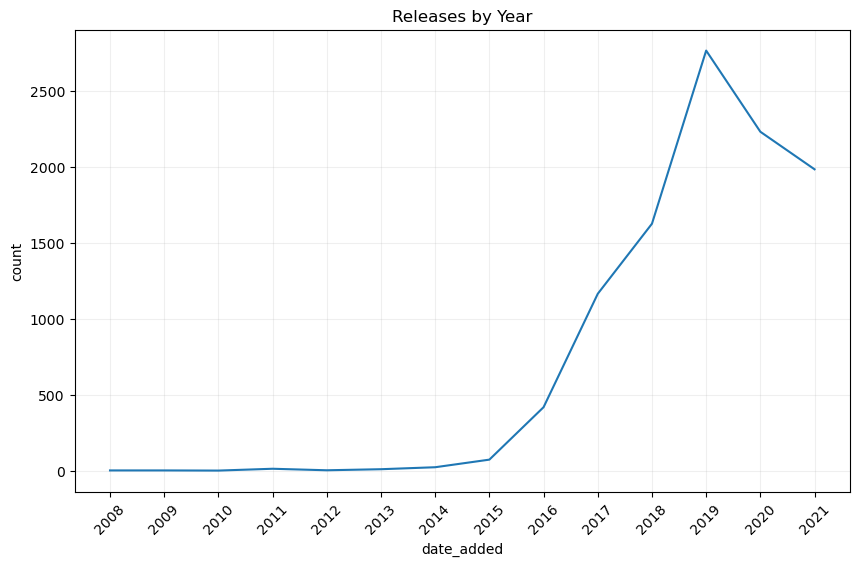

In [516]:
no_null_dates = streaming_data[~streaming_data['date_added'].isnull()]
year_releases = no_null_dates.groupby(no_null_dates['date_added'].dt.year).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.lineplot(x='date_added', y='count', data=year_releases)
plt.title('Releases by Year')
plt.xticks(year_releases['date_added'], rotation=45)
plt.grid(alpha=0.2)
plt.show()

### <center> The year 2019 had the most amount of releases added to the overall catalog. This may be due to the fact that Disney+ released around this time. Otherwise, this visual shows that over time, streaming has become more popular.

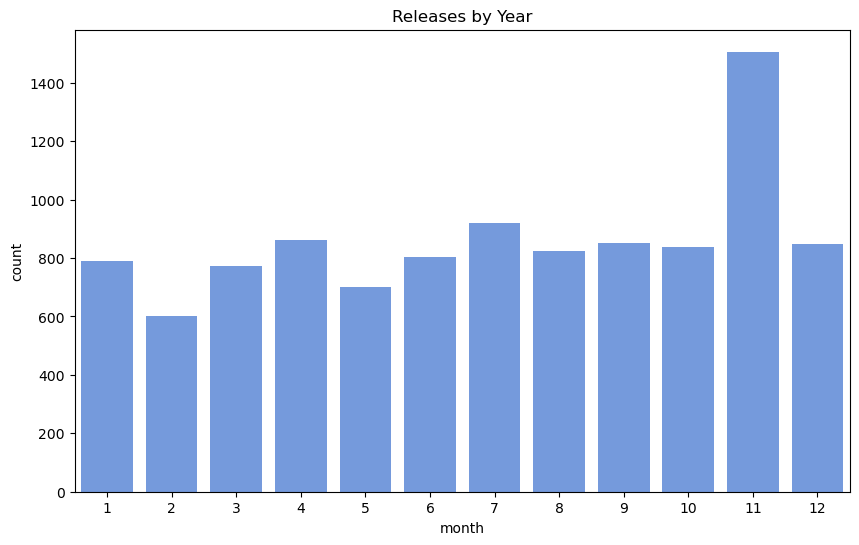

In [517]:
no_null_dates = streaming_data[~streaming_data['date_added'].isnull()]
month_releases = no_null_dates.groupby(no_null_dates['date_added'].dt.month).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='date_added', y='count', data=month_releases, color='cornflowerblue')
plt.title('Releases by Year')
plt.xlabel('month')
plt.show()

### <center> On average, there are 860 titles added in each month. However, November's title count is over 86% higher, at around 1500 titles. Potentially meaning that Late Fall and Early Winter have higher traffic.

## Let's compare the average duration of movies and TV shows across platforms

In [518]:
streaming_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform
0,n1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Listed,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix
1,n2,TV Show,Blood & Water,Not Listed,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,R,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix
2,n3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Listed,2021-09-24,2021,R,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix
3,n4,TV Show,Jailbirds New Orleans,Not Listed,Not Listed,Not Listed,2021-09-24,2021,R,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix
4,n5,TV Show,Kota Factory,Not Listed,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,R,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix


In [543]:
only_movies = streaming_data[streaming_data['type']=='Movie'].copy()
only_movies['duration_mins'] = only_movies['duration'].str.replace('min', '').astype('int')
real_films = only_movies[(only_movies['duration_mins'] < 270) & (only_movies['duration_mins'] > 30)]
films = real_films.groupby('platform')[['duration_mins']].agg(['mean', 'count']).round(2).reset_index()
films

platform duration_mins      
                    mean count
0   Amazon         93.73  7385
1  Disney+         89.42   821
2  Netflix        101.17  5999

### <center> On average, Netflix has longer movies at about 101 minutes long. Amazon Prime and Disney+ are on average about 7-11 minutes shorter. However, the Disney+ catalog is much smaller.

## What about TV shows? Let's combine the data

In [542]:
only_shows = streaming_data[streaming_data['type']=='TV Show'].copy()

only_shows['duration_seasons'] = only_shows['duration'].str.replace('Seasons', '')
only_shows['duration_seasons'] = only_shows['duration_seasons'].str.replace('Season', '').astype('int')
tv_shows = only_shows.groupby('platform')[['duration_seasons']].agg(['mean', 'count']).round(2).reset_index()
combined_df = pd.merge(films, tv_shows, on='platform')
combined_df

/tmp/ipykernel_53667/1436488383.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  combined_df = pd.merge(films, tv_shows, on='platform')


platform duration_mins       duration_seasons      
                    mean count             mean count
0   Amazon         93.73  7385             1.72  1854
1  Disney+         89.42   821             2.12   398
2  Netflix        101.17  5999             1.76  2676

### <center> Disney+ is the only platform with an average season that is over 2. This may be due to the fact that they prioritize quality over quantity.


## Let's compare the distribution of content ratings across platforms

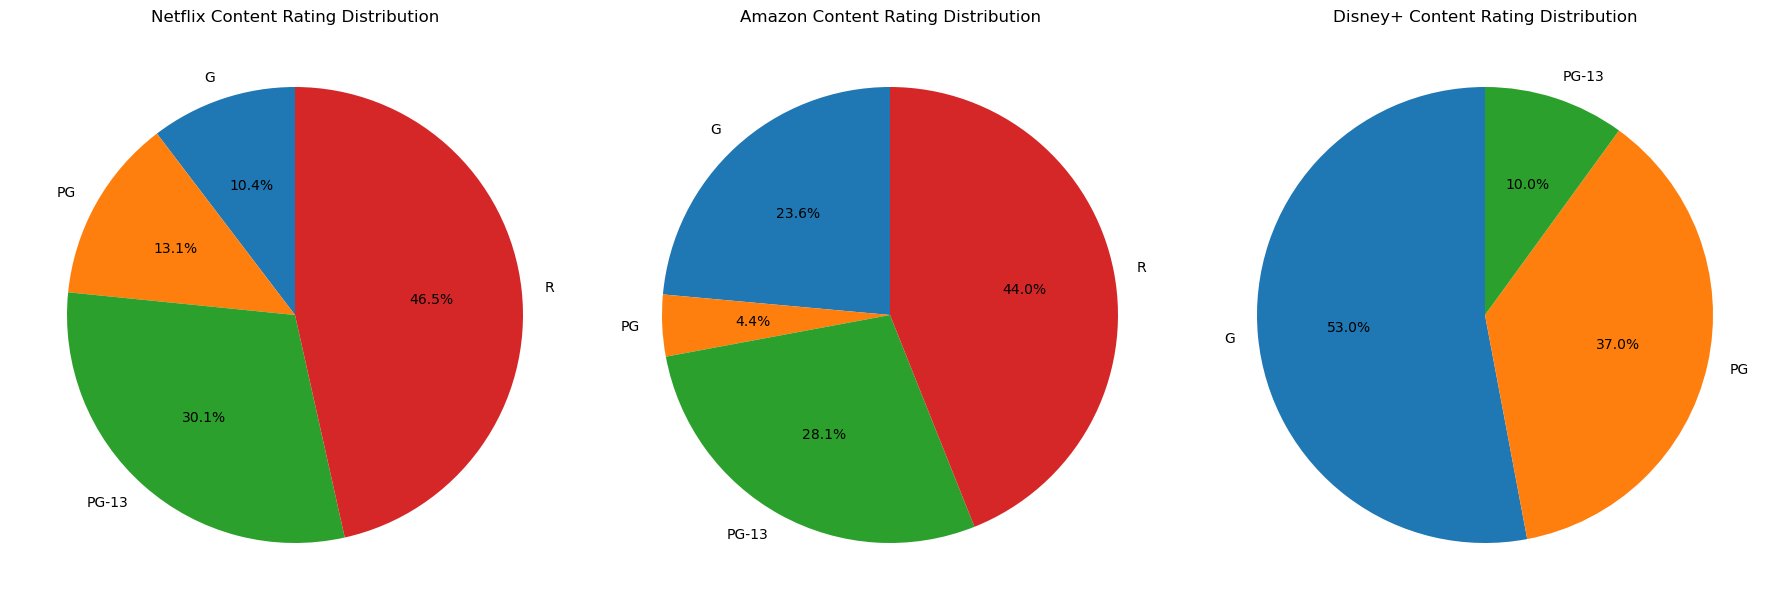

In [521]:
content_ratings = streaming_data.groupby(['rating','platform'])[['show_id']].count().reset_index()
content_ratings = content_ratings.rename(columns={'show_id': 'count'})
platforms = ['Netflix', 'Amazon', 'Disney+']


fig, axs = plt.subplots(1, 3, figsize=(18, 6))


for i, platform in enumerate(platforms):
    
    platform_data = content_ratings[content_ratings['platform'] == platform]
    
    
    ratings = platform_data['rating']
    counts = platform_data['count']
    

    axs[i].pie(counts, labels=ratings, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'{platform} Content Rating Distribution')


plt.tight_layout()
plt.show()

### <center> The data indicates that Amazon and Netflix offer a wide variety of content across different age ratings, with R-rated content being the most prevalent on both platforms, while Disney+ has a more limited selection, particularly in PG and below categories.

## Finally, Let's analyze the diversity of content based on the country of origin

In [607]:
diversity_data = streaming_data.copy()
diversity_data['country'] = diversity_data['country'].str.split(', ')


diversity_data = diversity_data.explode('country')
diversity_data = diversity_data[diversity_data['country']!='Not Listed']
diversity_data['country'].value_counts().reset_index().head(10)

,country,count
0,United States,5207
1,India,1297
2,United Kingdom,972
3,Canada,557
4,France,435
5,Japan,334
6,Germany,252
7,Spain,247
8,South Korea,245
9,Australia,189


### <center> We can see that the biggest markets include the likes of the US, India, and the UK